<a href="https://colab.research.google.com/github/Snowyyxx/Pytorch/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
start = 0
end = 10
step =0.1
bias = 0.3
weight=0.7
X = torch.arange(start,end,step)
y = X*weight + bias

In [3]:
len(X),len(y)

(100, 100)

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,train_size=0.2)

In [5]:
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1))
    self.bias = nn.Parameter(torch.randn(1))

  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.weight*x + self.bias

In [6]:
torch.manual_seed(42)
model = LinearRegression()

In [7]:
list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [8]:
model.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [9]:
X_test

tensor([8.3000, 5.3000, 7.0000, 4.5000, 4.4000, 3.9000, 2.2000, 8.0000, 1.0000,
        0.0000, 1.8000, 3.0000, 7.3000, 3.3000, 9.0000, 0.4000, 7.6000, 7.7000,
        1.2000, 3.1000, 5.5000, 8.8000, 2.6000, 4.2000, 6.9000, 1.5000, 4.0000,
        9.6000, 0.9000, 7.2000, 1.1000, 4.7000, 8.5000, 2.8000, 9.3000, 0.5000,
        6.6000, 6.5000, 3.5000, 1.6000, 4.9000, 3.4000, 0.7000, 9.5000, 2.7000,
        1.9000, 8.1000, 2.5000, 6.2000, 1.3000, 2.4000, 0.3000, 1.7000, 3.8000,
        0.8000, 7.8000, 0.6000, 6.4000, 3.6000, 8.9000, 5.6000, 9.9000, 5.4000,
        4.3000, 5.0000, 6.7000, 4.6000, 6.8000, 6.1000, 9.7000, 7.9000, 4.1000,
        5.8000, 4.8000, 9.8000, 5.7000, 7.5000, 3.2000, 9.4000, 5.9000])

### Making Prediction using torch.inference_mode()

In [10]:
with torch.inference_mode():
  y_pred = model(X_test)

In [11]:
y_pred

tensor([2.9233, 1.9133, 2.4856, 1.6439, 1.6102, 1.4419, 0.8695, 2.8223, 0.4655,
        0.1288, 0.7349, 1.1389, 2.5866, 1.2399, 3.1590, 0.2635, 2.6877, 2.7213,
        0.5328, 1.1725, 1.9806, 3.0917, 1.0042, 1.5429, 2.4520, 0.6338, 1.4756,
        3.3610, 0.4318, 2.5530, 0.4992, 1.7113, 2.9907, 1.0715, 3.2600, 0.2972,
        2.3510, 2.3173, 1.3072, 0.6675, 1.7786, 1.2736, 0.3645, 3.3274, 1.0379,
        0.7685, 2.8560, 0.9705, 2.2163, 0.5665, 0.9369, 0.2298, 0.7012, 1.4082,
        0.3982, 2.7550, 0.3308, 2.2836, 1.3409, 3.1254, 2.0143, 3.4620, 1.9469,
        1.5766, 1.8123, 2.3846, 1.6776, 2.4183, 2.1826, 3.3947, 2.7887, 1.5092,
        2.0816, 1.7449, 3.4284, 2.0479, 2.6540, 1.2062, 3.2937, 2.1153])

In [12]:
y_test

tensor([6.1100, 4.0100, 5.2000, 3.4500, 3.3800, 3.0300, 1.8400, 5.9000, 1.0000,
        0.3000, 1.5600, 2.4000, 5.4100, 2.6100, 6.6000, 0.5800, 5.6200, 5.6900,
        1.1400, 2.4700, 4.1500, 6.4600, 2.1200, 3.2400, 5.1300, 1.3500, 3.1000,
        7.0200, 0.9300, 5.3400, 1.0700, 3.5900, 6.2500, 2.2600, 6.8100, 0.6500,
        4.9200, 4.8500, 2.7500, 1.4200, 3.7300, 2.6800, 0.7900, 6.9500, 2.1900,
        1.6300, 5.9700, 2.0500, 4.6400, 1.2100, 1.9800, 0.5100, 1.4900, 2.9600,
        0.8600, 5.7600, 0.7200, 4.7800, 2.8200, 6.5300, 4.2200, 7.2300, 4.0800,
        3.3100, 3.8000, 4.9900, 3.5200, 5.0600, 4.5700, 7.0900, 5.8300, 3.1700,
        4.3600, 3.6600, 7.1600, 4.2900, 5.5500, 2.5400, 6.8800, 4.4300])

In [13]:
import matplotlib.pyplot as plt

def plot_predictions(test_labels = y_test,test_values=X_test,train_values=X_train,train_labels=y_train,predicted_values=y_pred):
    # Plot training data
    plt.scatter(train_values, train_labels, color='r', label='Train Data')

    # Plot test data
    plt.scatter(test_values, test_labels, label='Test Data')

    # Plot predicted values (if provided)
    if predicted_values is not None:
        plt.scatter(test_values, predicted_values, color='g', label='Predicted Data')

    # Set title and labels
    plt.title('Data Visualization')
    plt.xlabel('Values')
    plt.ylabel('Labels')
    plt.legend(loc='upper left')

    # Show the plot
    plt.show()

# Sample usage (you need to define y_test, X_test, X_train, y_train, and y_pred)
# plot_predictions(y_test, X_test, X_train, y_train, y_pred)


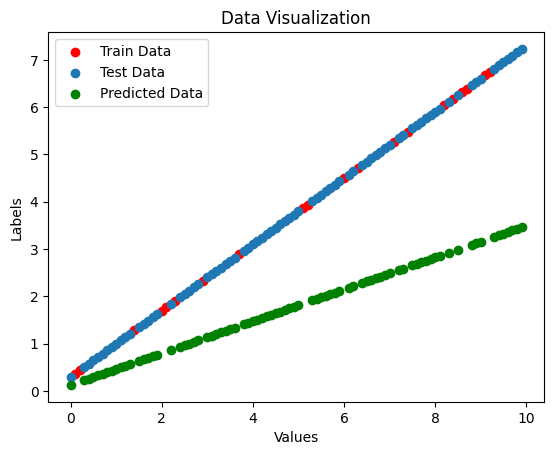

In [14]:
plot_predictions()

In [15]:
#Loss Function:
MAE_loss = nn.L1Loss()

#Setup Optimizer: (Random Gradient Descenet blah blah)
optimizer = torch.optim.SGD(params=model.parameters(),lr = 0.01) #lr = learningrate

In [16]:
# Building a training loop (and a testing loop):

Training Loop:
0. Loop throught the data
1. Push the data in forward method
2. Calculate Loss
3. Optimizer step
4. Loss Backward: move backwards throught the network to calculate the gradients of each of the paramters of our models.
5. Optimzer Step

In [17]:
# An epoch is one loop through the data...
epochs = 100
torch.manual_seed(42)

#0. Loop through the data:
for epoch in range(epochs):
  model.train() # train mode in pytorch set
  #forward pass:
  y_pred = model(X_test)
  #Calculate Loss:
  loss  = MAE_loss(y_pred,y_test)
  #optimizer:
  optimizer.zero_grad()
  #perform back propagation on the loss with respect to the parameters of the model:
  loss.backward()
  #step the optimizer: (perform gradient descent)
  optimizer.step()


  #Testing:
  model.eval() # turns off the different settings in the model not needed for testing:
  with torch.inference_mode(): #turns of gradient tracking!
    #1. DO the forward pass
    test_predictions = model(X_test)

    #2. Calculate the loss:
    test_loss = MAE_loss(test_predictions,y_test)

    if epoch %10 ==0:
      print(f"Epoch:{epoch}|Test {loss}| Test Loss: {test_loss}")


Epoch:0|Test 1.9468666315078735| Test Loss: 1.697989821434021
Epoch:10|Test 0.12123721837997437| Test Loss: 0.11883042007684708
Epoch:20|Test 0.20657742023468018| Test Loss: 0.03855485841631889
Epoch:30|Test 0.1490112841129303| Test Loss: 0.09335829317569733
Epoch:40|Test 0.19339951872825623| Test Loss: 0.0530393011868
Epoch:50|Test 0.21610641479492188| Test Loss: 0.03125002607703209
Epoch:60|Test 0.23067128658294678| Test Loss: 0.017358873039484024
Epoch:70|Test 0.16524523496627808| Test Loss: 0.0813567191362381
Epoch:80|Test 0.17719078063964844| Test Loss: 0.070747509598732
Epoch:90|Test 0.1835157573223114| Test Loss: 0.06493739783763885


In [18]:
model.state_dict()

OrderedDict([('weight', tensor([0.7409])), ('bias', tensor([0.2876]))])

In [19]:
weight,bias

(0.7, 0.3)

In [20]:
with torch.inference_mode():
  y_preds_new = model(X_test)

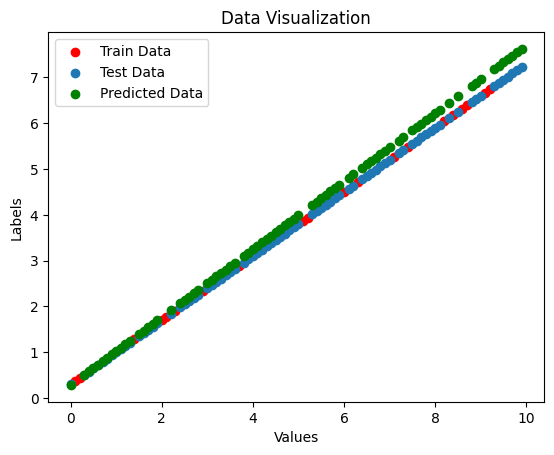

In [21]:
plot_predictions(predicted_values=y_preds_new)